In [111]:
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
def removepunct(str_in):
    for n in [".",",","!","'",'"','\n','-']:
        str_in = str_in.replace(n,'')
    
    str_out = str_in.lower()
    return unicode(str_out)

In [123]:
def parse_round(x):
    y = None
    parsed = None
    if type(x) == str:
        parsed = re.search(r'([0-9]+)+',x).group(1)
        y = int(parsed)
    if (type(x) == int) or (type(x) == float):
        y = int(x)
    return y

In [124]:
mens_mixed_url = 'https://docs.google.com/spreadsheets/d/15TNjIJDkopneZ6PWg4IGhTQNvTl-T5U8u_i9zgJPEXA/export?format=csv&id=15TNjIJDkopneZ6PWg4IGhTQNvTl-T5U8u_i9zgJPEXA&gid=0'
elos_workbook = 'https://raw.githubusercontent.com/robfox92/HockeyElo/master/Elos_2016b_week_1.csv'


mens_mixed_raw = pd.read_csv(mens_mixed_url)
elos_start_raw = pd.read_csv(elos_workbook)

In [125]:
# Only get results that are validated
results = mens_mixed_raw[mens_mixed_raw['Validate'] == 'Y']
results.reset_index(inplace=True)

In [126]:
results['Round_number'] = results['ROUND'].apply(parse_round)
results.head()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,index,ROUND,HOME,SCORE,SCORE.1,AWAY,OT,Validate,H_Win,A_Win,H_Tie,A_Tie,H_OTL,A_OTL,H_Loss,A_Loss,Round_number
0,0,1,The SwanBourne Supremacy,14.0,12.0,Balcatta Bandits,NaN,Y,W,NaN,NaN,NaN,NaN,NaN,NaN,L,1
1,2,1,Belmontgomery Burns,12.0,7.0,C. Montgomery Cockburns,NaN,Y,W,NaN,NaN,NaN,NaN,NaN,NaN,L,1
2,3,1,Bicton Banter Lords,15.0,5.0,Morley Puck Troopers,NaN,Y,W,NaN,NaN,NaN,NaN,NaN,NaN,L,1
3,5,1,Greenmount Doom,17.0,7.0,Bayswater Croquet Club,NaN,Y,W,NaN,NaN,NaN,NaN,NaN,NaN,L,1
4,6,1,Swan View Draught,7.0,5.0,Morley Flying Hellfish,NaN,Y,W,NaN,NaN,NaN,NaN,NaN,NaN,L,1


In [127]:
results['HOME'] = results['HOME'].apply(removepunct)
results['AWAY'] = results['AWAY'].apply(removepunct)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [128]:
 def getKfactor(x):
        newteam = 'New Team'
        newteamK = 75
        oldteamK = 50
        if x == newteam:
            out = newteamK
        else:
            out = oldteamK
        return out

team_elos['K Factor'] = team_elos['New Team'].apply(getKfactor)
team_K_factors = dict(zip(team_elos['2016b Teams lower'],team_elos['K Factor']))

In [129]:
results.loc[:,'Home Elo'] = None
results.loc[:,'Away Elo'] = None

In [130]:
results.head()

,index,ROUND,HOME,SCORE,SCORE.1,AWAY,OT,Validate,H_Win,A_Win,H_Tie,A_Tie,H_OTL,A_OTL,H_Loss,A_Loss,Round_number,Home Elo,Away Elo
0,0,1,the swanbourne supremacy,14.0,12.0,balcatta bandits,NaN,Y,W,NaN,NaN,NaN,NaN,NaN,NaN,L,1,None,None
1,2,1,belmontgomery burns,12.0,7.0,c montgomery cockburns,NaN,Y,W,NaN,NaN,NaN,NaN,NaN,NaN,L,1,None,None
2,3,1,bicton banter lords,15.0,5.0,morley puck troopers,NaN,Y,W,NaN,NaN,NaN,NaN,NaN,NaN,L,1,None,None
3,5,1,greenmount doom,17.0,7.0,bayswater croquet club,NaN,Y,W,NaN,NaN,NaN,NaN,NaN,NaN,L,1,None,None
4,6,1,swan view draught,7.0,5.0,morley flying hellfish,NaN,Y,W,NaN,NaN,NaN,NaN,NaN,NaN,L,1,None,None


In [131]:
# Create a dict of team starting elos
team_elos = elos_start_raw
team_elos['2016b Teams lower'] = elos_start_raw['2016b Teams'].apply(removepunct)
elos_dict = dict(zip(team_elos['2016b Teams lower'],team_elos['Starting Elo']))

for row in range(0,len(results)):

    # Get the home and away teams
    hometeam = results['HOME'][row]
    awayteam = results['AWAY'][row]


    # Get the elos from the elo dictionary
    awayElo = elos_dict[awayteam]
    homeElo = elos_dict[hometeam]
    # Write to the df
    results.loc[row,'Home Elo'] = homeElo
    results.loc[row,'Away Elo'] = awayElo
        

    # Get the team K factors
    homeK = team_K_factors[hometeam]
    awayK = team_K_factors[awayteam]

    # Calculate the Score Expectancies
    homeSE = 1 / (1 + 10 ** -((homeElo - awayElo) / 400))
    awaySE = 1 / (1 + 10 ** ((homeElo - awayElo) / 400))
    # Write to DF
    results.loc[row,'Home Predicted Result'] = homeSE
    results.loc[row,'Away Predicted Result'] = awaySE


    # Get home, away and total scores
    homescore = results['SCORE'][row]
    awayscore = results['SCORE.1'][row]
    totalscore = homescore+awayscore

    # Calculate home and away score percentages
    homeScorePerc = homescore / totalscore
    awayScorePerc = awayscore / totalscore
    # Write to DF
    results.loc[row,'Home Actual Result'] = homeScorePerc
    results.loc[row,'Away Actual Result'] = awayScorePerc
   
    # Find Elo Changes
    homeNewElo = homeElo + homeK * (homeScorePerc - homeSE)
    awayNewElo = awayElo + awayK * (awayScorePerc - awaySE)

    # Check to ensure winning teams don't lose Elo
    if homescore > awayscore:
        homeNewElo = max(homeNewElo,homeElo)
    if awayscore > homescore:
        awayNewElo = max(awayNewElo,awayElo)
 
    newElos = {hometeam:homeNewElo, awayteam:awayNewElo}

    elos_dict.update(newElos)

In [132]:
hometeams = set(results['HOME'].unique())
awayteams = set(results['AWAY'].unique())
teams = hometeams | awayteams

In [133]:
print "all hometeams in teams?",hometeams.issubset(teams)
print "all awayteams in teams?",awayteams.issubset(teams)

all hometeams in teams? True
all awayteams in teams? True


In [143]:
def getscoreprogression(team):
    progress = []
    team = unicode(team)
    if team in teams:
        progress = results[results['HOME']==team]
        progress = progress.append(results[results['AWAY']==team])
        progress.sort_values('Round_number',inplace=True)
        progress.reset_index(inplace=True)
    else:
        out = None
    if len(progress)>0:
        out = []
        for row in range(0,len(progress)):
            if progress.loc[row,'HOME'] == team:
                roundno = progress.loc[row,'Round_number']
                if type(roundno) == str:
                    roundno = parse_round(roundno)
                out.append((progress.loc[row,'Round_number'],progress.loc[row,'Home Elo']))
            if progress.loc[row,'AWAY'] == team:
                roundno = progress.loc[row,'Round_number']
                if type(roundno) == str:
                    roundno = parse_round(roundno)
                out.append((roundno,progress.loc[row,'Away Elo']))
    return out

In [144]:
getscoreprogression('harambaeyswater')

[(1, 585.58014810000009),
 (2, 586.66017060062006),
 (3, 606.16571449908554),
 (4, 601.20708608741631),
 (5, 615.18911702470643),
 (6, 618.32379907906443)]

In [145]:
def getresults(team):
    progress = []
    team = unicode(team)
    if team in teams:
        progress = results[results['HOME']==team]
        progress = progress.append(results[results['AWAY']==team])
        progress.sort_values('Round_number',inplace=True)
        progress.reset_index(inplace=True)
        out = progress
    else:
        out = None
    
    return out

In [146]:
getresults('harambaeyswater');

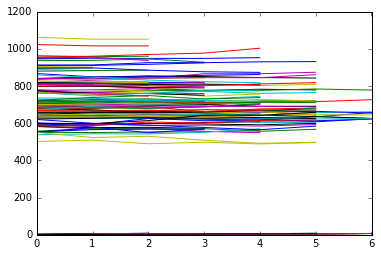

In [147]:
for team in teams:
    if getscoreprogression(team) is not None:
        plt.plot(getscoreprogression(team))


In [141]:
parse_round('9-10 BYE')

9